In [83]:
import pandas as pd
data=pd.read_csv('/content/Heart.csv')
print(data.head())

   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  


In [84]:
print(data.describe())

       Unnamed: 0         Age         Sex      RestBP        Chol         Fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868  131.689769  246.693069    0.148515   
std     87.612784    9.038662    0.467299   17.599748   51.776918    0.356198   
min      1.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     76.500000   48.000000    0.000000  120.000000  211.000000    0.000000   
50%    152.000000   56.000000    1.000000  130.000000  241.000000    0.000000   
75%    227.500000   61.000000    1.000000  140.000000  275.000000    0.000000   
max    303.000000   77.000000    1.000000  200.000000  564.000000    1.000000   

          RestECG       MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241  
std      0.994971   22.875003 

In [85]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB
None


In [86]:
data=data.drop(['Unnamed: 0'], axis=1)

In [87]:
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [88]:
data=data.dropna()

In [89]:
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [90]:
data.shape

(297, 14)

In [91]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['AHD']=label_encoder.fit_transform(data['AHD'])
data['ChestPain']=label_encoder.fit_transform(data['ChestPain'])
data['Thal']=label_encoder.fit_transform(data['Thal'])

In [92]:
x=data.drop(['AHD'], axis=1)
y=data['AHD']

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=2)

In [94]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=2)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2)

In [95]:
print(dtc.feature_importances_)

[0.03003201 0.01559028 0.06786561 0.06171154 0.07026419 0.01948786
 0.         0.11578407 0.01732254 0.11984525 0.05580207 0.13276211
 0.29353248]


In [96]:
print(dtc.score(x_train, y_train))
print(dtc.score(x_test, y_test))

1.0
0.7555555555555555


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


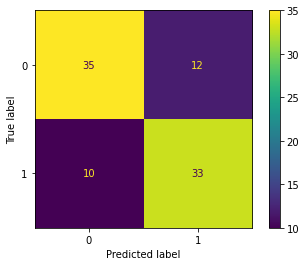

In [97]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
y_pred=dtc.predict(x_test)
plot_confusion_matrix(dtc, x_test, y_test)

Text(0, 0.5, 'True Positive Rate')

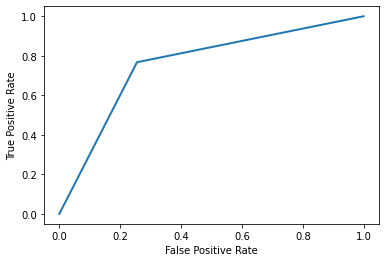

In [98]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
roc=roc_auc_score(y_test, dtc.predict_proba(x_test)[:, 1])
fpr, tpr, thresholds=roc_curve(y_test, dtc.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr, linewidth=2, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

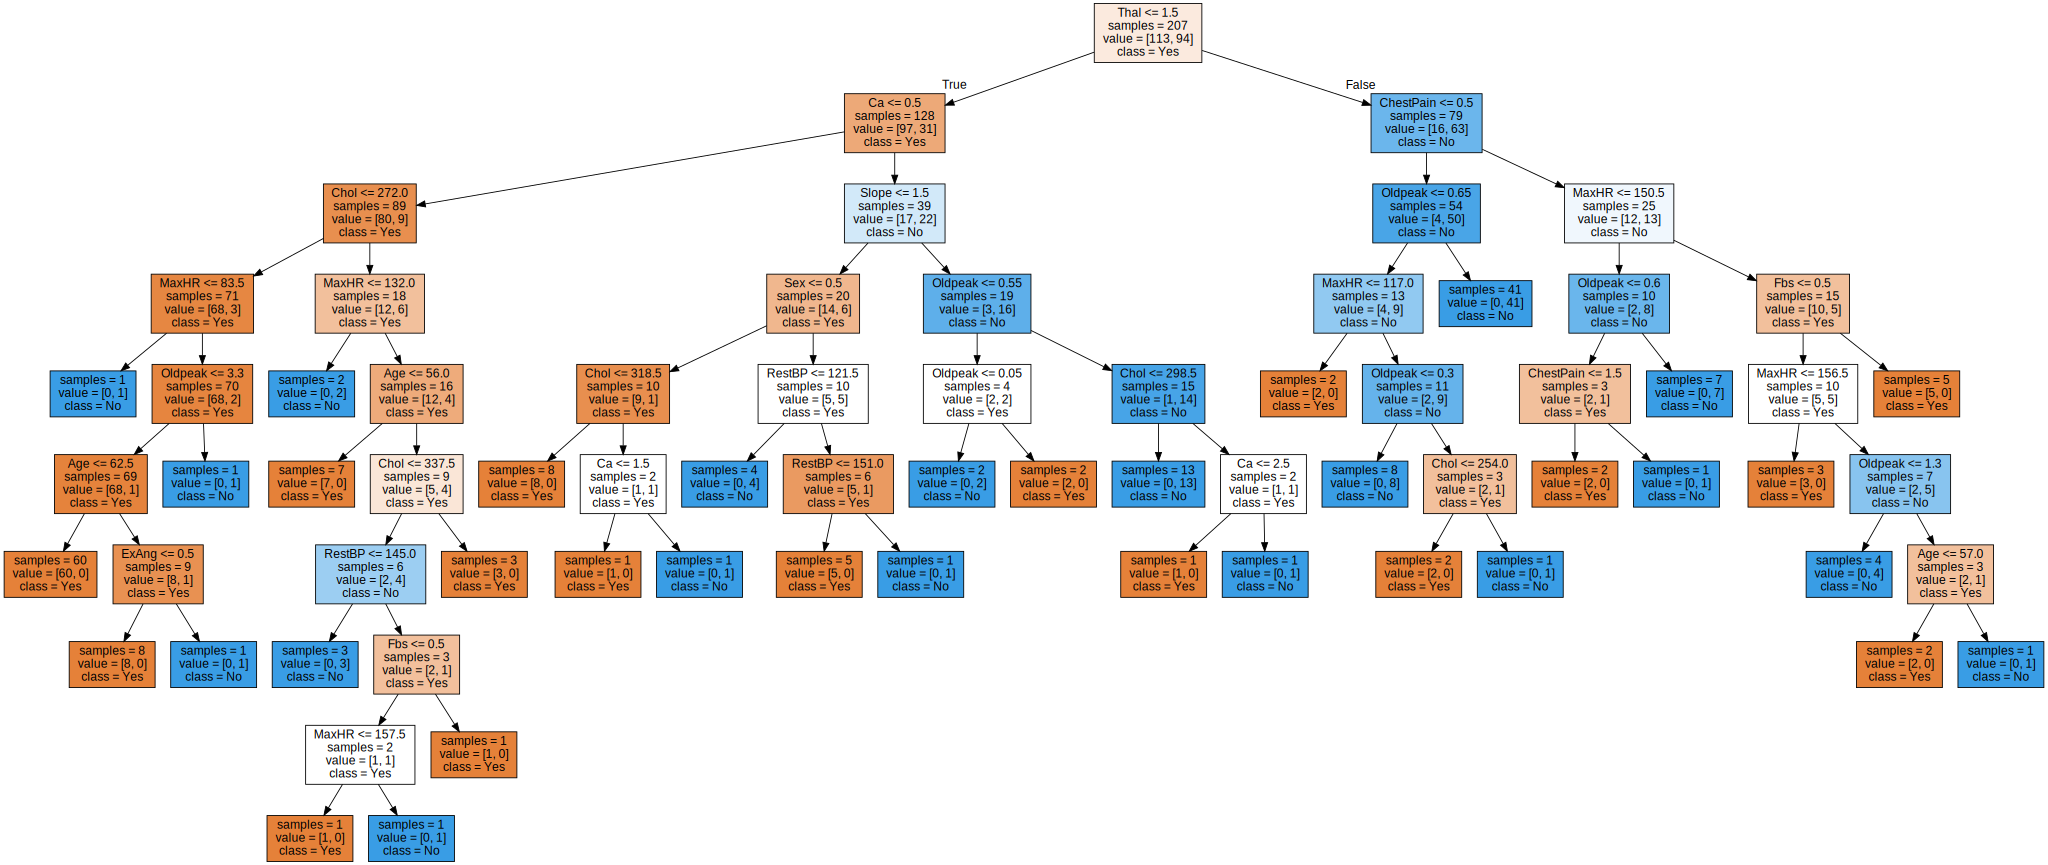

In [99]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(dtc, out_file='dtc.dot', class_names=['Yes', 'No'], feature_names=x.columns, impurity=False, filled=True)
with open('dtc.dot') as f:
  dot_graph=f.read()
  display(graphviz.Source(dot_graph))

In [100]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
param_choice={'max_leaf_nodes': np.linspace(20, 100, 30).astype(int), 'max_depth': list(range(3, 11)), 'max_features': list(range(2,17)), 'min_samples_split': list(range(2,10))}
rnd_search_cv=RandomizedSearchCV(dtc, param_choice, n_iter=100, cv=5, random_state=2)
rnd_search_cv.fit(x_train, y_train)
print(rnd_search_cv.best_estimator_)
print(rnd_search_cv.best_params_)
tuned_tree=rnd_search_cv.best_estimator_
dtc1=DecisionTreeClassifier(max_depth=rnd_search_cv.best_params_['max_depth'], max_leaf_nodes=rnd_search_cv.best_params_['max_leaf_nodes'], random_state=2)
dtc1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=4, max_leaf_nodes=20,
                       min_samples_split=7, random_state=2)
{'min_samples_split': 7, 'max_leaf_nodes': 20, 'max_features': 4, 'max_depth': 3}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
110 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=20, random_state=2)

In [101]:
print(dtc1.feature_importances_)

[0.         0.         0.09382248 0.         0.04053887 0.
 0.         0.0435383  0.         0.03113676 0.09540978 0.19367511
 0.5018787 ]


In [102]:
print(dtc1.score(x_train, y_train))
print(dtc1.score(x_test, y_test))

0.8599033816425121
0.7888888888888889


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


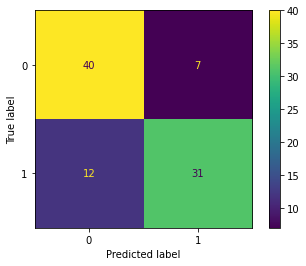

In [103]:
y_pred=dtc1.predict(x_test)
plot_confusion_matrix(dtc1, x_test, y_test)

Text(0, 0.5, 'True Positive Rate')

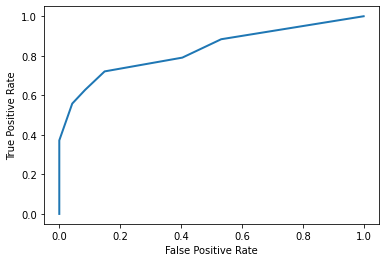

In [121]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
roc=roc_auc_score(y_test, dtc1.predict_proba(x_test)[:, 1])
fpr, tpr, thresholds=roc_curve(y_test, dtc1.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr, linewidth=2, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [105]:
from sklearn.ensemble import BaggingClassifier
max_depth=2
n_estimators=100
basemodel=DecisionTreeClassifier(max_depth=rnd_search_cv.best_params_['max_depth'], max_leaf_nodes=rnd_search_cv.best_params_['max_leaf_nodes'], random_state=2)
bagging=BaggingClassifier(base_estimator=basemodel, n_estimators=n_estimators)
bagging.fit(x_train, y_train)
bagging.predict(x_test)

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0])

In [106]:
print(bagging.score(x_train, y_train))
print(bagging.score(x_test, y_test))

0.8888888888888888
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


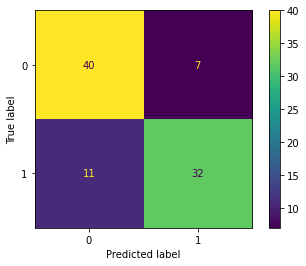

In [107]:
y_pred=bagging.predict(x_test)
plot_confusion_matrix(bagging, x_test, y_test)

Text(0, 0.5, 'True Positive Rate')

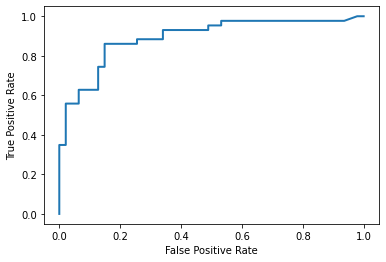

In [108]:
roc=roc_auc_score(y_test, bagging.predict_proba(x_test)[:, 1])
fpr, tpr, thresholds=roc_curve(y_test, bagging.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr, linewidth=2, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [109]:
from sklearn.linear_model import LogisticRegression
basemodel=LogisticRegression(random_state=0, solver='lbfgs', max_iter=2000)
bagging=BaggingClassifier(base_estimator=basemodel, n_estimators=n_estimators)
bagging.fit(x_train, y_train)
bagging.predict(x_test)

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0])

In [110]:
print(bagging.score(x_train, y_train))
print(bagging.score(x_test, y_test))

0.855072463768116
0.8222222222222222


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


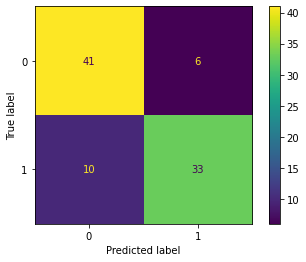

In [111]:
y_pred=bagging.predict(x_test)
plot_confusion_matrix(bagging, x_test, y_test)

Text(0, 0.5, 'True Positive Rate')

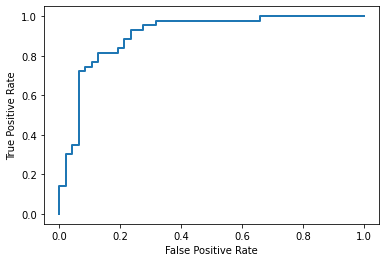

In [112]:
roc=roc_auc_score(y_test, bagging.predict_proba(x_test)[:, 1])
fpr, tpr, thresholds=roc_curve(y_test, bagging.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr, linewidth=2, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [114]:
for i in range(5):
  export_graphviz(bagging.estimators_[i], out_file='bg'+str(i)+'.dot', class_names=['Yes', 'No'], feature_names=x.columns, impurity=False, filled=True)
for i in range(5):
  with open('bg'+str(i)+'.dot') as f:
    dot_graph=f.read()
  display(graphviz.Source(dot_graph))

AttributeError: ignored

In [115]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=5, n_estimators=100, max_features='sqrt', oob_score=True)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', oob_score=True)

In [116]:
print(rfc.feature_importances_)

[0.06953106 0.0378725  0.1211961  0.06268524 0.06145508 0.01232405
 0.01569728 0.11317783 0.03379613 0.11650719 0.05110244 0.12831494
 0.17634014]


In [117]:
print(rfc.oob_score_)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.8019323671497585
0.9516908212560387
0.8444444444444444


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


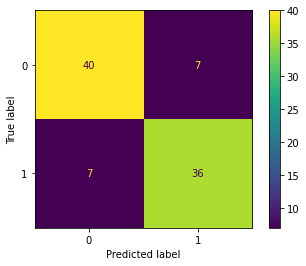

In [118]:
y_pred=rfc.predict(x_test)
plot_confusion_matrix(rfc, x_test, y_test)

Text(0, 0.5, 'True Positive Rate')

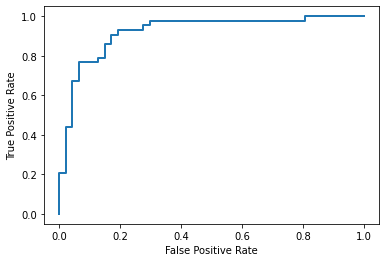

In [119]:
roc=roc_auc_score(y_test, rfc.predict_proba(x_test)[:, 1])
fpr, tpr, thresholds=roc_curve(y_test, rfc.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr, linewidth=2, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [120]:
feature_importances=np.mean([dtc.feature_importances_ for dtc in bagging.estimators_], axis=0)
feature_imp={}
for i in range(len(x.columns)):
  feature_imp[x.columns[i]]=feature_importances[i]
print(feature_imp)
feature_imp=sorted(feature_imp.items(), key=lambda k: (k[1], k[0]), reverse=True)
print(feature_imp)
impfeatures=[i[0] for i in feature_imp[:5]]
print(impfeatures)
impfeatures=x[impfeatures]
impfeatures.head()

AttributeError: ignored